In [1]:
#references
# https://pixspy.com/
# https://blog.csdn.net/xufive/article/details/112308533
# https://tw511.com/a/01/36832.html
# https://auzhu.com/sports/1025003.html

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

In [313]:
def reduce_highlights(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 先轉成灰階處理
    ret, thresh = cv2.threshold(img_gray, 200, 255, 0)  # 利用 threshold 過濾出高光的部分，目前設定高於 200 即為高光
    contours, hierarchy  = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img_zero = np.zeros(img.shape, dtype=np.uint8) 
    
#     print(len(contours))

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour) 
        img_zero[y:y+h, x:x+w] = 255 
        mask = img_zero     
    
    # alpha，beta 共同決定高光消除後的模糊程度
    # alpha: 亮度的缩放因子，默認是 0.2， 範圍[0, 2], 值越大，亮度越低
    # beta:  亮度缩放後加上的参数，默認是 0.4， 範圍[0, 2]，值越大，亮度越低
    result = cv2.illuminationChange(img, mask, alpha=0.2, beta=0.4) 
        
    return result

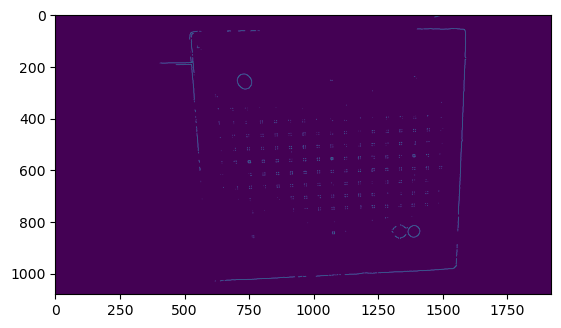

In [496]:
img = cv2.imread('./data/frame444.jpg')
orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = reduce_highlights(orig_img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (9,9), 3)
gray = cv2.Canny(gray, 70, 70)

plt.imshow(gray)
plt.show()

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


/tmp/ipykernel_174136/3842556495.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mesh = np.linspace(0, 1100, 19, dtype=np.int)


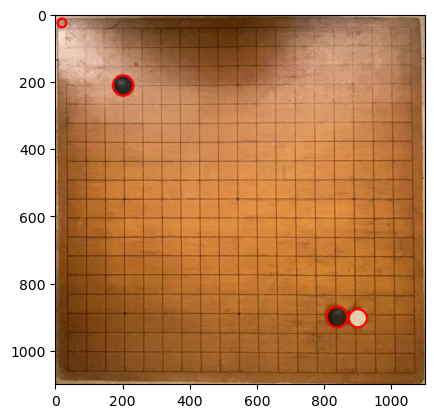

In [511]:
pts1 = np.float32([(513,55),(583,1040),(1603,57),(1554,981)])
pts2 = np.float32([(0,0), (0,1100), (1100,10), (1100,1100)])


m = cv2.getPerspectiveTransform(pts1, pts2) 
fixed_rgb_img = cv2.warpPerspective(img, m, (1100, 1100))
fixed_gray_img = cv2.warpPerspective(gray, m, (1100, 1100))

circle1 = cv2.HoughCircles(fixed_gray_img, cv2.HOUGH_GRADIENT, 1, 20, param1=100, param2=15, minRadius=5, maxRadius=35)
circles = circle1[0, :, :]
circles = np.uint16(np.around(circles))

for i in circles:
    cv2.circle(fixed_rgb_img, (i[0], i[1]), i[2], (255,0,0), 5)
    
plt.imshow(fixed_rgb_img)


mesh = np.linspace(0, 1100, 19, dtype=np.int)
rows, cols = np.meshgrid(mesh, mesh)
phase = np.zeros_like(rows, dtype=np.uint8)
im_hsv = cv2.cvtColor(fixed_rgb_img, cv2.COLOR_BGR2HSV_FULL)
for circle in circles:    
	row = int(round((circle[1])/60))
	col = int(round((circle[0])/60))
	# print(row,col)
	# print(circle)
	hsv_ = im_hsv[cols[row,col]-7:cols[row,col]+7, rows[row,col]-7:rows[row,col]+7]
	s = np.mean(hsv_[:,:,1])
	v = np.mean(hsv_[:,:,2])
 
	if 0 < v < 250 and 0 < s < 250:
		phase[row,col] = 1 # 黑棋
	if 200 > np.mean(hsv_[:, :, 0]) > 150:
	# elif 150 < s < 170 and 230 < v < 250:
		phase[row,col] = 2 # 白棋

# print go board prediction
print(phase)

In [364]:
def get_harris_points(harrisim, min_dist=10, threshold=0.1):
    corner_threshold = harrisim.max() * threshold
    harrisim_t = (harrisim > corner_threshold) * 1
    
    coords = array(harrisim_t.nonzero()).T
    candidate_values = [harrisim[c[0], c[1]] for c in coords]
    
    index = argsort(candidate_values)[::-1]
    
    allowed_locations = zeros(harrisim.shape)
    allowed_locations[min_dist:-min_dist, min_dist:-min_dist] = 1
    filtered_coords = []
    for i in index:
        if allowed_locations[coords[i,0], coords[i,1]] == 1:
            filtered_coords.append(coords[i])
            allowed_locations[(coords[i,0]-min_dist):(coords[i,0]+min_dist), (coords[i,1]-min_dist):(coords[i,1]+min_dist)] = 0
    return filtered_coords

In [ ]:
from pylab import *
from numpy import *
wid = 9
filtered_coords1 = get_harris_points()